# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
import statsmodels.api as sm
from statsmodels.formula.api import ols

Now that I've managed the data, I want to answer some questions about it using some visualizations and analyses. Specifically, I am going to figure out whether I have run further and faster more recently in my running career compared to earlier. The goal of this exercise is to familiarize myself with how to run correlations and linear models, two types of statistical tests that I will likely use in my lab in the future, as well as to acquaint myself with scatterplots and the syntax of plotting in matplotlib.

First, let's read in and view the cleaned data that I managed in df_management.ipynb.

In [2]:
d = pd.read_csv("clean.csv")

In [3]:
pd.options.display.max_rows=3000
#print(d)
print(d.tail(10))
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
2906  2021-12-13     4.03   0:28:35  7.092639
2907  2021-12-16     5.02   0:35:39  7.101594
2908  2021-12-17     6.00   0:42:48  7.133333
2909  2021-12-19    10.22   1:11:18  6.976517
2910  2021-12-21     6.36   0:49:01  7.707023
2911  2021-12-22     7.27   0:52:56  7.281064
2912  2021-12-24    12.04   1:20:04  6.650055
2913  2021-12-25     3.17   0:27:23  8.638275
2914  2021-12-26     4.41   0:33:16  7.543462
2915  2021-12-28     6.00   0:44:51  7.475000


## Descriptive and Correlational Analyses

I want to get a general sense of the data I'm working with by conducting a histogram of runs by pace, as seen in the first plot below.

Let's also check out a histogram of runs by distance (second plot below).

(array([  3.,  38.,  62.,  70.,  83., 470., 882., 431., 156.,  72.,  28.,
         15.]),
 array([ 4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,
         9.5, 10. ]),
 <a list of 12 Patch objects>)

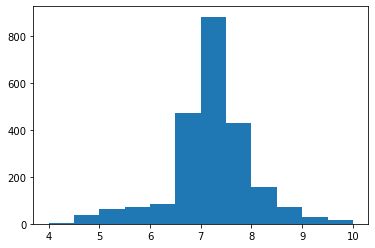

In [4]:
plt.hist(d['pace_min'], bins = [4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10])

(array([ 20., 106., 127., 335., 443., 346., 371., 326., 321., 155., 164.,
         36.,  66.,  31.,  29.,  19.,  10.,   7.,   4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

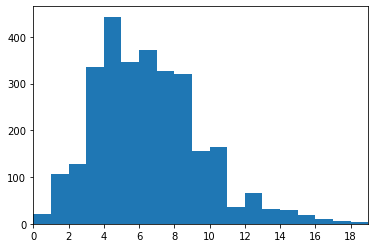

In [5]:
plt.xticks(np.arange(0, max(d['Mileage'])+1, 2.0))
plt.xlim(0,19)
plt.hist(d['Mileage'], bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

We can see in the plots above that both the pace and distance of my runs are roughly normally distributed, with the histogram for distance being slightly right-skewed. The most common pace of my runs is in the 7:00-7:30 min/mi range. The most common distance is in the 4-mile range, but there is a wider peak from 3-9 miles.

Let's back up these visualizations with some descriptive statistics. As we can see below, the mean pace of a run of mine is 7.292 minutes, or 7 minutes 18 seconds, with a standard deviation of 56 seconds. The mean distance is 6.07 miles (reflecting the right skew of the above histogram), and the standard deviation of nearly 3 miles can be visualized in the broad peak we see in the histogram.

In [6]:
d.describe()

,Mileage,pace_min
count,2916.000000,2324.000000
mean,6.346773,7.243629
std,2.970185,0.860129
min,0.250000,4.000000
25%,4.100000,6.910907
50%,6.010000,7.252247
75%,8.020000,7.614775
max,18.290000,14.930140


I want advance my visualizations and analyses a bit by graphing pace by distance on a scatterplot. We can see the resulting plot below.

Below that, I run a Pearson's R correlation test to see if there is a relationship between pace and distance. To do that, I have to create a new dataset without any NAs for the runs where I didn't log my time.

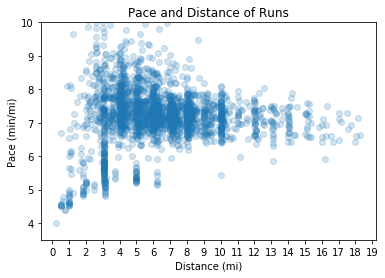

In [7]:
plt.ylim(3.5, 10)
plt.scatter(d['Mileage'], d['pace_min'], alpha=0.2)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlabel("Distance (mi)")
plt.ylabel("Pace (min/mi)")
plt.title("Pace and Distance of Runs")
plt.show()

In [8]:
dna = d.dropna()
print(dna)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
10    2010-01-26     2.60   0:24:19   9.352564
...          ...      ...       ...        ...
2906  2021-12-13     4.03   0:28:35   7.092639
2907  2021-12-16     5.02   0:35:39   7.101594
2908  2021-12-17     6.00   0:42:48   7.133333
2909  2021-12-19    10.22   1:11:18   6.976517
2910  2021-12-21     6.36   0:49:01   7.707023
2911  2021-12-22     7.27   0:52:56   7.281064
2912  2021-12-24    12.04   1:20:04   6.650055
2913  2021-12-25     3.17   0:27:23   8.638275
2914  2021-12-26     4.41   0:33:16   7.543462
2915  2021-12

In [9]:
st.pearsonr(dna['Mileage'], dna['pace_min'])

(0.004353686595277385, 0.8338471164059942)

The first number output above is the r statistic, and the second number is the p-value. Turns out, there is a significant correlation according to the p-value; however, Pearson's r is so small that it is doubtful there is much difference in pace based on the run's distance. The significant p-value is easy to achieve with a sample size of 1817, with even the smallest differences biasing the statistic towards significance.

I also ran a linear regression on the data to ensure I got similar results. The R-squared value of less than .01 emphasizes the smallness of the differences present in the pace-by-distance data.

In [10]:
x = np.array(dna['Mileage'].tolist())
x = x.reshape(-1, 1)
y = np.array(dna['pace_min'].tolist())
y = y.reshape(-1, 1)
model = lm.LinearRegression().fit(x, y)

In [11]:
r_sq = model.score(x,y)
print('R-Squared:', r_sq)

R-Squared: 1.8954586969988085e-05


## Analyses Grouped by Time Period

I suspect a more interesting set of analyses will be exploring differences in the data over time, as I know anecdotally that I am in better running shape now than I was in the early years of my running career. To complete these analyses, I need to split the "Date" column into three different columns for the year, the month, and the day. Doing this will allow me to group by year or month in my analyses.

In [12]:
from dolwick_project import splitdate
from dolwick_project import test_splitdate
ymd = splitdate.splitdate(d, d['Date'])
print(ymd)
#testing that the function splitdate worked as it should
test_splitdate.tsd()

            Date  Mileage time_corr   pace_min  year month day
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07
5     2010-01-11     1.30       NaN        NaN  2010    01  11
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25
...          ...      ...       ...        ...   ...   ...  ..
2906  2021-12-13     4.03   0:28:35   7.092639  2021    12  13
2907  2021-12-16     5.02   0:35:39   7.101594  2021    12  16
2908  2021-12-17     6.00   0:42:48   7.133333  2021    12  17
2909  2021-12-19    10.22   1:11:18   6.976517  2021   

In [13]:
#testing if all years are correct (the year value should either stay the same or increase from row to row)
yearshift = ymd['year'].shift(1)
yeartest = ymd['year'] >= yearshift
y = yeartest.drop(yeartest.index[0])
for i in y:
    assert(i == True)

### Analyses with Runs Grouped by Year

Now that I have the new and improved dataset, I'm going to visualize the same pace by distance graph as before, but with each data point colored based on year. As can be seen in the legend below, the warmer colors correspond to more recent runs, and the cooler colors to runs earlier in my career.

From this visualization, we can see that the majority of my longer runs have occurred since 2016 and that the majority of my shorter and slower runs occurred in the first few years of running. We can also see vertical lines for distances I run commonly, the most prominent of which occurs at 3.1 miles and corresponds to the 99 5K races I have run in my career. We can see that this vertical line becomes warmer in color as the pace becomes faster, indicating that my 5K times have improved over the years. We can also notice the other vertical lines that occur at fast paces, which visualize other race distances I have run (e.g. 8K [4.97mi] or 10K [6.2mi]).

/Users/AlexDolwick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


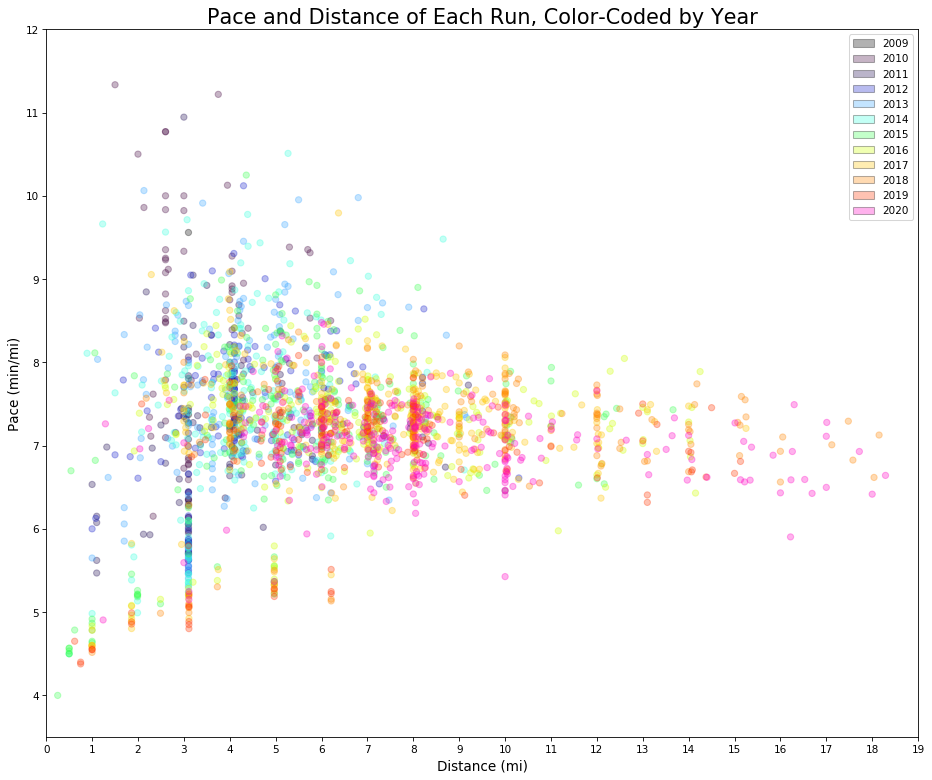

In [14]:
# pace and distance graph 2009-2020

ymd2009_2020 = ymd[(ymd['year'] < '2021')]

col_dict20 = {'2009':'#000000', '2010':'#450842', '2011':'#1B0951', '2012':'#1620CD', '2013':'#3AA6FF', '2014':'#3AFFDE',
              '2015':'#3AFF51', '2016':'#D0FF00', '2017':'#FFC600', '2018':'#FF8600', '2019':'#FF3600', '2020':'#FF00C6'}

ymd2009_2020['colcol'] = ymd2009_2020['year'].map(col_dict20)

#created figure and customized axis limits and labels
fig = plt.figure(figsize=(15,12.5),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(0,19)
plt.ylim(3.5, 12)
ax = fig.gca()
ax.scatter(ymd2009_2020['Mileage'],ymd2009_2020['pace_min'],c=ymd2009_2020['colcol'],alpha=0.3)
ax.set_xlabel('Distance (mi)', fontsize=13)
ax.set_ylabel('Pace (min/mi)', fontsize=13)
ax.set_title('Pace and Distance of Each Run, Color-Coded by Year', fontsize=20)

#mapped colors used in the chart onto the legend
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict20.items()]
ax.legend(handles = leg_el)

#saved figure to png
plt.savefig("pace_distance2009-2020.png")

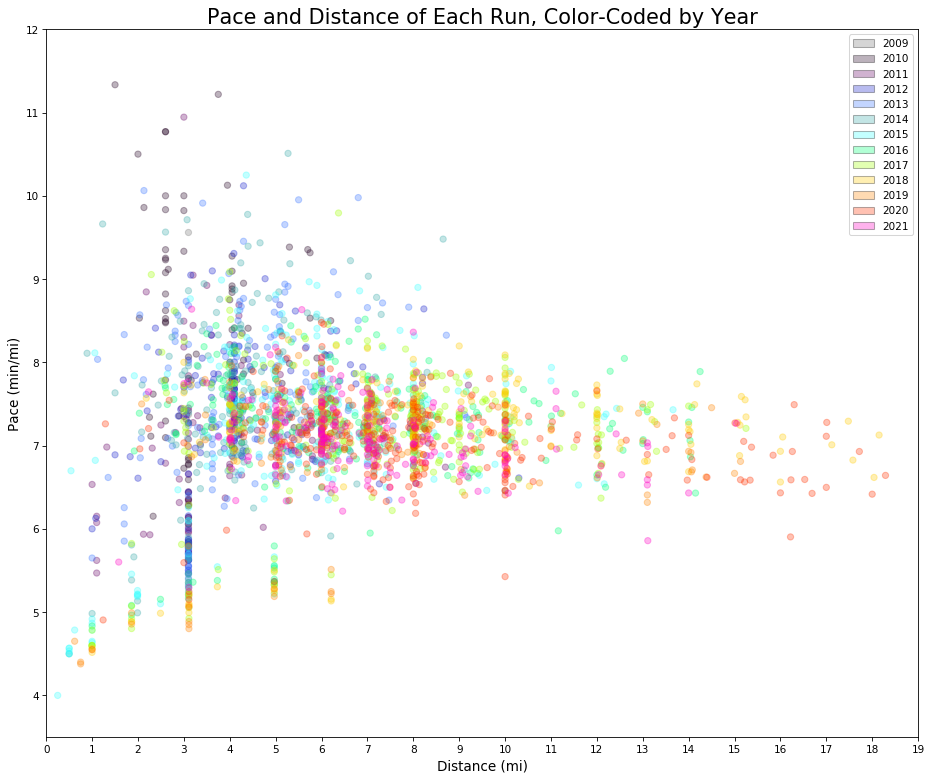

In [15]:
#created a dictionary matching years to color codes and added it to my df as a new column
col_dict = {'2009':'#777777', '2010':'#220022', '2011':'#660066', '2012':'#1620CD' , '2013':'#3A76FF' , '2014':'#3AAAAA' ,
            '2015':'#3AFFFF' , '2016':'#00FF77', '2017':'#A0FF00', '2018':'#FFCC00', '2019':'#FF8600', '2020':'#FF3300',
            '2021':'#FF00C6'}
ymd['colcol'] = ymd['year'].map(col_dict)

#created figure and customized axis limits and labels
fig = plt.figure(figsize=(15,12.5),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(0,19)
plt.ylim(3.5, 12)
ax = fig.gca()
ax.scatter(ymd['Mileage'],ymd['pace_min'],c=ymd['colcol'],alpha=0.3)
ax.set_xlabel('Distance (mi)', fontsize=13)
ax.set_ylabel('Pace (min/mi)', fontsize=13)
ax.set_title('Pace and Distance of Each Run, Color-Coded by Year', fontsize=20)

#mapped colors used in the chart onto the legend
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict.items()]
ax.legend(handles = leg_el)

#saved figure to png
plt.savefig("pace_distance.png")

To run analyses on these data, we need to again drop all NAs in the dataset. After doing so, we can analyze distance and pace by year.

In [16]:
ymdna = ymd.dropna()
print(ymdna)

            Date  Mileage time_corr   pace_min  year month day   colcol
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25  #777777
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21  #777777
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04  #220022
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05  #220022
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07  #220022
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14  #220022
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16  #220022
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19  #220022
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25  #220022
10    2010-01-26     2.60   0:24:19   9.352564  2010    01  26  #220022
...          ...      ...       ...        ...   ...   ...  ..      ...
2906  2021-12-13     4.03   0:28:35   7.092639  2021    12  13  #FF00C6
2907  2021-12-16     5.02   0:35:39   7.101594  2021    12  16  

Now let's visualize the data in a boxplot so we can see mileage grouped by year more distinctly. After we do that, we will run an ordinary least squares regression to test for significant differences between years.

/Users/AlexDolwick/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Mileage by Year')

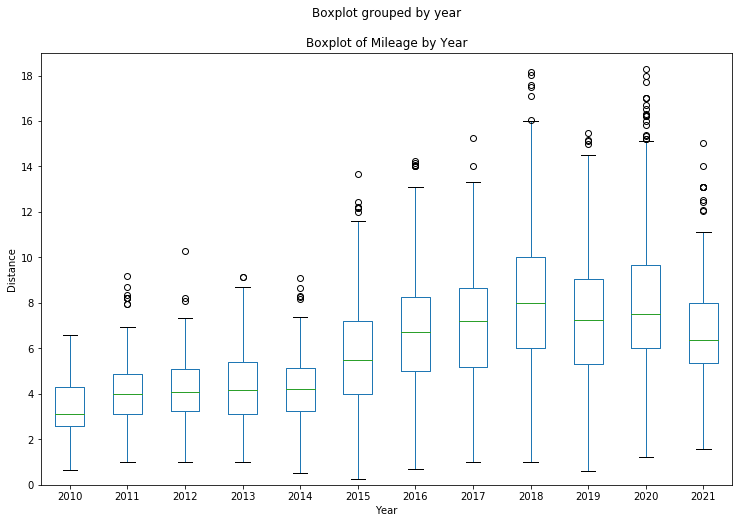

In [17]:
ymd2010up = ymd[(ymd['year'] != '2009')]
ymdna2010up = ymdna[(ymdna['year'] != '2009')]
ymdna2010s = ymdna2010up[(ymdna2010up['year'] != '2020') & (ymdna2010up['year'] != '2021')]
#ymd2010s.boxplot('Mileage', by='year', figsize=(12, 8))
ymd2010up.boxplot('Mileage', by='year', figsize=(12, 8))
plt.yticks(np.arange(0, max(ymd2010up['Mileage'])+1, 2.0))
plt.ylim(0,19)
plt.ylabel("Distance")
plt.xlabel("Year")
plt.grid(b=None)
plt.title("Boxplot of Mileage by Year")
#plt.savefig("Yearly_Mileage.png")

In the boxplot above, it appears that in years 2015 and later, I ran longer runs on average compared to previous years.

In the regression below, we can analyze the 95% confidence intervals to understand significance from year to year. We can see that in all but one year (2011), I ran significantly more miles per run than in the "control" year 2010. We also find that none of the confidence intervals for years 2010-2014 overlaps with any of the confidence intervals for years 2015-2019. So we can determine that in each year 2015 and later, I ran significantly more miles per run than in each year 2010-2014. It is also worth noting that I ran significantly more miles per run in 2018 than in each other year.

In [18]:
dist_by_yr = ols('Mileage ~ C(year)', data=ymd2010up).fit()
dist_by_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     100.4
Date:                Sat, 01 Jan 2022   Prob (F-statistic):          6.76e-194
Time:                        18:29:18   Log-Likelihood:                -6836.6
No. Observations:                2914   AIC:                         1.370e+04
Df Residuals:                    2902   BIC:                         1.377e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4251      0.229     14.938      0.000       2.975       3.875
C(year)[T.2011]     0.6516      0.319      2.045      0.041       0.027       1.276
C(year)[T.2012]     0.9106      0.305      2.987      0.003       0.313       1.508
C(year)[T.2013]     0.8431      0.304      2.773      0.006       0.247       1.439
C(year)[T.2014]     0.9167      0.282      3.248      0.001       0.363       1.470
C(year)[T.2015]     2.1212      0.272      7.796      0.000       1.588       2.655
C(year)[T.2016]     3.4328      0.272     12.605      0.000       2.899       3.967
C(year)[T.2017]     3.5813      0.270     13.255      0.000       3.052       4.111
C(year)[T.2018]     4.7932      0.265     18.079      0.000       4.273       5.313
C(year)[T.2019]     4.0154      0.271     14.842      0.000       3.485       4.546
C(year)[T.2020]     4.7239      0.272     17.354      0.000       4.190       5.258
C(year)[T.2021]     3.4404      0.285     12.063      0.000       2.881       4.000
==============================================================================
Omnibus:                      198.517   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.341
Skew:                           0.545   Prob(JB):                     1.83e-67
Kurtosis:                       4.158   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's do the same visualizations and analyses for pace grouped by year.

/Users/AlexDolwick/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(3.5, 15.5)

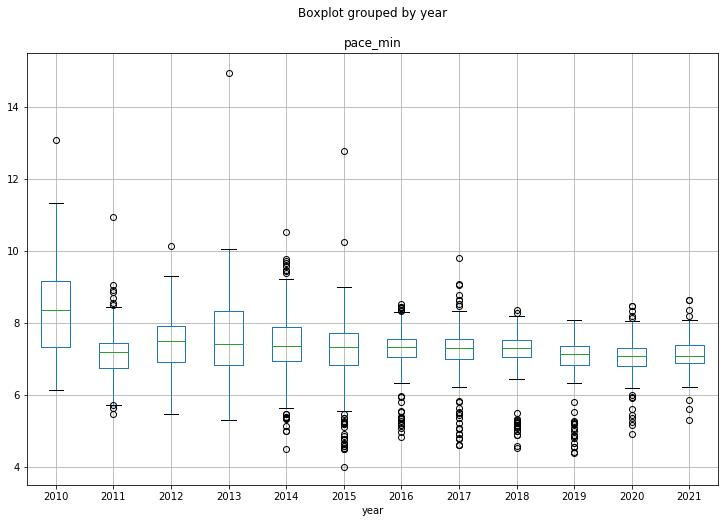

In [19]:
ymd2010up.boxplot('pace_min', by='year', figsize=(12, 8))
plt.ylim(3.5,15.5)

The boxplot above makes it clear that my runs in 2010 averaged slower than the rest of the years, but it is difficult to see any other differences in pace by year apart from that.

The regression below backs up this result. All years 2011 and onwards are significantly different from the intercept year 2010 in that the average pace of runs in those years is faster than that of runs in 2010.

In [20]:
pace_by_yr = ols('pace_min ~ C(year)', data=ymd2010up).fit()
pace_by_yr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     20.41
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           6.77e-40
Time:                        18:29:19   Log-Likelihood:                -2834.1
No. Observations:                2322   AIC:                             5692.
Df Residuals:                    2310   BIC:                             5761.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.3414      0.093     90.176      0.000       8.160       8.523
C(year)[T.2011]    -1.1753      0.120     -9.783      0.000      -1.411      -0.940
C(year)[T.2012]    -0.9910      0.115     -8.630      0.000      -1.216      -0.766
C(year)[T.2013]    -0.7923      0.115     -6.908      0.000      -1.017      -0.567
C(year)[T.2014]    -0.9320      0.109     -8.571      0.000      -1.145      -0.719
C(year)[T.2015]    -1.1536      0.107    -10.812      0.000      -1.363      -0.944
C(year)[T.2016]    -1.1091      0.106    -10.436      0.000      -1.317      -0.901
C(year)[T.2017]    -1.1148      0.105    -10.582      0.000      -1.321      -0.908
C(year)[T.2018]    -1.1773      0.108    -10.904      0.000      -1.389      -0.966
C(year)[T.2019]    -1.4278      0.113    -12.643      0.000      -1.649      -1.206
C(year)[T.2020]    -1.3025      0.105    -12.426      0.000      -1.508      -1.097
C(year)[T.2021]    -1.2211      0.108    -11.317      0.000      -1.433      -1.010
==============================================================================
Omnibus:                      292.060   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3227.498
Skew:                          -0.011   Prob(JB):                         0.00
Kurtosis:                       8.776   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I wanted to compare the pace of my runs in the last 9 years of the decade without the outliear year of 2010 included in the model. When I ran this model, some significant differences arose. Specifically, runs in 2013 and 2014 were run significantly slower than those in the intercept year of 2011, while runs in 2019 were run significantly faster than those in 2011.

In [21]:
ymd2011on = ymdna2010s[(ymdna2010s['year'] != '2010')]
pace_by_yr2011 = ols('pace_min ~ C(year)', data=ymd2011on).fit()
pace_by_yr2011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     6.866
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           6.40e-09
Time:                        18:29:19   Log-Likelihood:                -2228.8
No. Observations:                1746   AIC:                             4476.
Df Residuals:                    1737   BIC:                             4525.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.1661      0.081     88.380      0.000       7.007       7.325
C(year)[T.2012]     0.1843      0.108      1.700      0.089      -0.028       0.397
C(year)[T.2013]     0.3831      0.108      3.539      0.000       0.171       0.595
C(year)[T.2014]     0.2434      0.101      2.407      0.016       0.045       0.442
C(year)[T.2015]     0.0217      0.099      0.220      0.826      -0.172       0.215
C(year)[T.2016]     0.0663      0.098      0.675      0.500      -0.126       0.259
C(year)[T.2017]     0.0605      0.097      0.624      0.533      -0.130       0.251
C(year)[T.2018]    -0.0020      0.100     -0.020      0.984      -0.199       0.195
C(year)[T.2019]    -0.2525      0.106     -2.379      0.017      -0.461      -0.044
==============================================================================
Omnibus:                      209.226   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1984.652
Skew:                          -0.110   Prob(JB):                         0.00
Kurtosis:                       8.218   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Analyses with Runs Grouped by Month

I am also interested in whether I run farther and/or faster at certain times of the year compared to others. I wanted to start with the same color-coded pace and distance scatterplot as before, but with the colors indicating months instead of years.

The plot below does not indicate trends as obviously as the corresponding graph grouped by year did. It will be interesting to see whether any significant results can be drawn out.

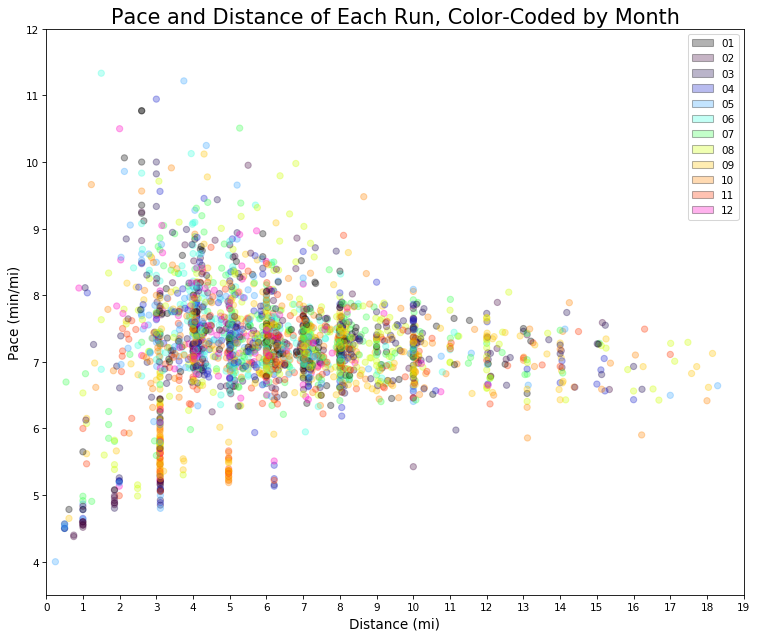

In [22]:
#same code as in year-wise graph above 
#but with a couple modifications to variable names to ensure it is distinct from the other graph
mcol_dict = {'01':'#000000', '02':'#450842', '03':'#1B0951', '04':'#1620CD' , '05':'#3AA6FF' , '06':'#3AFFDE' , '07':'#3AFF51' , '08':'#D0FF00', '09':'#FFC600', '10':'#FF8600', '11':'#FF3600', '12':'#FF00C6'}
ymd['colcolm'] = ymd['month'].map(mcol_dict)

mfig = plt.figure(figsize=(12,10),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(0,19)
plt.ylim(3.5, 12)
axm = mfig.gca()
axm.scatter(ymd['Mileage'],ymd['pace_min'],c=ymd['colcolm'],alpha=0.3)
axm.set_xlabel('Distance (mi)', fontsize=13)
axm.set_ylabel('Pace (min/mi)', fontsize=13)
axm.set_title('Pace and Distance of Each Run, Color-Coded by Month', fontsize=20)

leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in mcol_dict.items()]
axm.legend(handles = leg_el)
plt.savefig("pace_distance_month.png")

When the months are discretely grouped in a boxplot with distance as the dependent variable, it appears that May, June, December, and perhaps also April include shorter runs on average than the other months.

/Users/AlexDolwick/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 19)

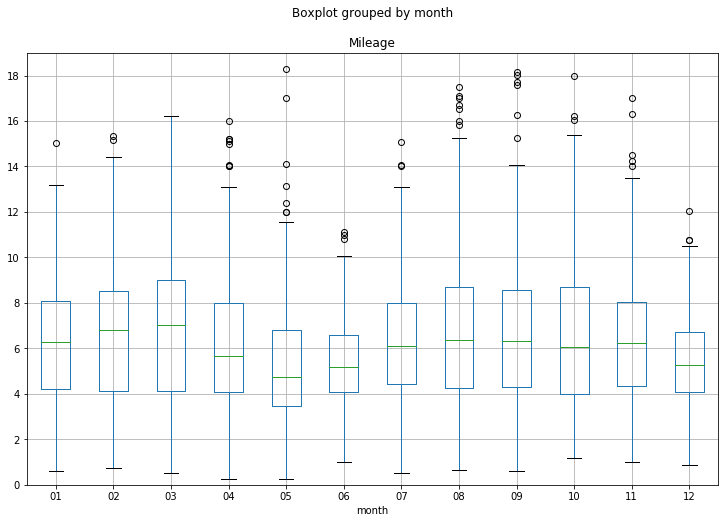

In [23]:
ymd.boxplot('Mileage', by='month', figsize=(12, 8))
plt.yticks(np.arange(0, max(ymd['Mileage'])+1, 2.0))
plt.ylim(0,19)

The OLS regression below shows that my runs in May, June, and December (but not April) are on average significantly shorter than those in the control month of January. September trneds towards longer runs, but does not achieve significance at the p < .05 level. However, based on confidence intervals, runs in September (and those in March) are significantly longer than those in May, June, and December.

In [24]:
dist_by_month = ols('Mileage ~ C(month)', data=ymd).fit()
dist_by_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Mileage   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     8.829
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.28e-15
Time:                        18:29:21   Log-Likelihood:                -7263.6
No. Observations:                2916   AIC:                         1.455e+04
Df Residuals:                    2904   BIC:                         1.462e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.4833      0.191     33.880      0.000       6.108       6.859
C(month)[T.02]     0.0895      0.273      0.328      0.743      -0.445       0.624
C(month)[T.03]     0.4763      0.275      1.735      0.083      -0.062       1.015
C(month)[T.04]    -0.3846      0.279     -1.377      0.169      -0.932       0.163
C(month)[T.05]    -1.1613      0.289     -4.020      0.000      -1.728      -0.595
C(month)[T.06]    -1.0589      0.274     -3.865      0.000      -1.596      -0.522
C(month)[T.07]    -0.2051      0.260     -0.790      0.430      -0.714       0.304
C(month)[T.08]     0.2284      0.253      0.904      0.366      -0.267       0.724
C(month)[T.09]     0.4572      0.253      1.805      0.071      -0.040       0.954
C(month)[T.10]     0.1252      0.255      0.490      0.624      -0.376       0.626
C(month)[T.11]     0.0270      0.270      0.100      0.920      -0.503       0.557
C(month)[T.12]    -1.0664      0.288     -3.697      0.000      -1.632      -0.501
==============================================================================
Omnibus:                      229.206   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.974
Skew:                           0.677   Prob(JB):                     1.62e-66
Kurtosis:                       3.812   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, let's look at trends in pace by month. The boxplot seems to indicate that I run faster on average in September, October, and November, than the rest of the year, although perhaps not by much.

/Users/AlexDolwick/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


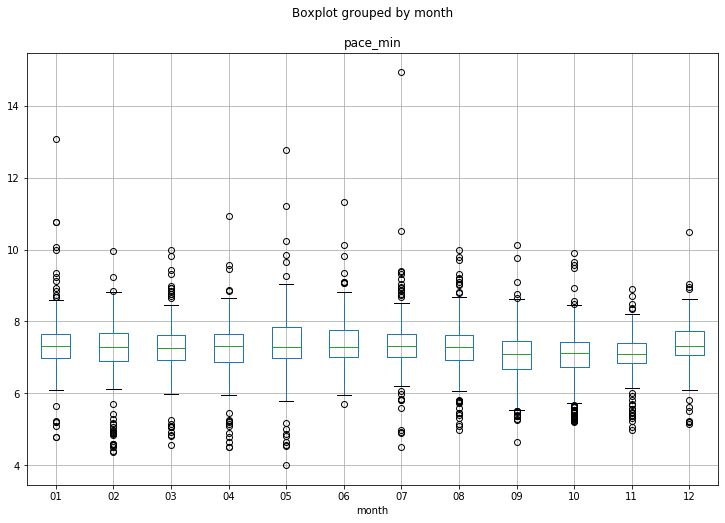

In [25]:
ymd.boxplot('pace_min', by='month', figsize=(12, 8))

The OLS regression indeed shows that I run significantly faster in the three fall months than in January. Surprisingly, I also run faster in February than in January on average.

In [26]:
pace_by_month = ols('pace_min ~ C(month)', data=ymd).fit()
pace_by_month.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pace_min   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.841
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           1.93e-11
Time:                        18:29:22   Log-Likelihood:                -2909.7
No. Observations:                2324   AIC:                             5843.
Df Residuals:                    2312   BIC:                             5912.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.4017      0.064    115.402      0.000       7.276       7.527
C(month)[T.02]    -0.2766      0.091     -3.027      0.002      -0.456      -0.097
C(month)[T.03]    -0.1170      0.092     -1.273      0.203      -0.297       0.063
C(month)[T.04]    -0.1674      0.094     -1.783      0.075      -0.352       0.017
C(month)[T.05]    -0.0236      0.095     -0.247      0.805      -0.210       0.163
C(month)[T.06]     0.0596      0.087      0.684      0.494      -0.111       0.230
C(month)[T.07]    -0.0293      0.084     -0.347      0.728      -0.195       0.136
C(month)[T.08]    -0.1025      0.083     -1.228      0.220      -0.266       0.061
C(month)[T.09]    -0.3765      0.084     -4.506      0.000      -0.540      -0.213
C(month)[T.10]    -0.3702      0.085     -4.366      0.000      -0.537      -0.204
C(month)[T.11]    -0.3354      0.089     -3.754      0.000      -0.511      -0.160
C(month)[T.12]    -0.0544      0.095     -0.570      0.569      -0.242       0.133
==============================================================================
Omnibus:                      378.210   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3880.632
Skew:                           0.437   Prob(JB):                         0.00
Kurtosis:                       9.270   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Future Directions

Going forward, I would like to take a more in-depth look at some of this data as I use it to continue working towards data science proficiency in python. I will also likely use some of this code as an example to myself when I have data from the lab that I want to analyze.